# Linear Regression HW 3

In [1]:
# Import necessary Libraries

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Part 1: Examine the Data
* Load synthetic data from data folder (curve80.txt)
* It is a 1-D data with first column in the data file is the feature and and second column is the target
* Print the shape of your data (the features and the target)
* Plot a scatter plot for your data (the features on the X-axis, the target on the Y-axis). X-axis label is "feature" and Y-axis label is "target". The title of your plot should be "DataSet". Your scatter plot has to have the labels and the title on it. 
* **Add this plot in your submitted pdf report**

(80, 1)
(80, 1)
2
2


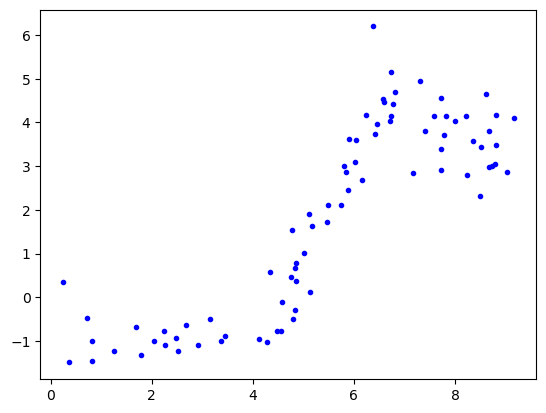

In [2]:
# Your code is here

# Load the data as a numpy array 
curve = np.genfromtxt("curve80.txt", delimiter=None)
#print(curve.shape)
#print(curve.ndim)

# Separate your array to feature (X) and target (y)

X,y=np.split(curve,2,axis=1)

X.reshape(-1, 1)
y.reshape(-1, 1)

# Print the shape and dimensions of your array (X, y)
#I used this source for knowing how to do this: https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/

print(X.shape)
print(y.shape)
print(X.ndim)
print(y.ndim)
# Plot
plt.plot(X, y, 'b.')


## Part 2: Use linear regression to train a model to fit your training data. 
* You need to make sure you fix the random seed to '0' to ensure repeatability of results.
* Use train_test_split method to train and test data here with train/test 75/25
* After you fit your model using LinearRegression() from python, predict the targets of the "training data"
* On one plot, show the following (**Add this plot to your submitted report**): 
   1. The training data as a scatter plot (X-axis is the features in the training data, Y-axis is the true target of the training data)
   2. The predicted model as a line  (X-axis is the features in the training data, Y-axis is the predicted target using your trained mode)
   3. X-axis label is "feature" and Y-axis label is "target". The title of your plot should be "Training Set". Your  plot has to have the labels and the title on it. 
* Print the coefficients of your linear model ($w_0$ and $w_1$) and **report them in your submitted pdf report**. 

The coefficients are: 
[[0.75749973]]


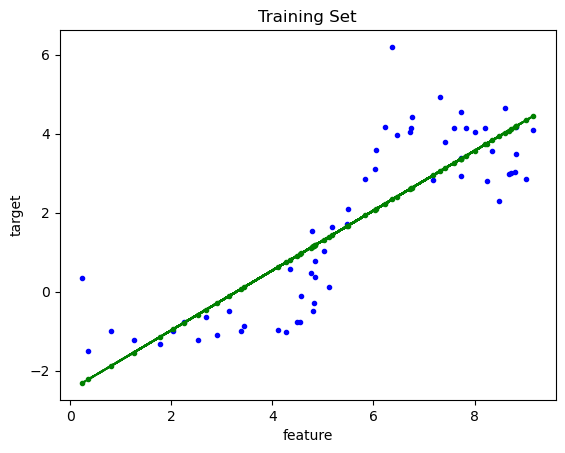

In [3]:
# Your code is here
np.random.seed(0)

# Use only train and test data here with train/test 75/25 
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.25, random_state=0)

# Create an object from LinearRegression() 
reg = LinearRegression()

# Fit your model using the training data 
reg.fit(xTrain, yTrain)

# Predict the target in the training data using your fitted model
pred = reg.predict(xTrain)


# Plot
plt.title("Training Set")
plt.xlabel("feature")
plt.ylabel("target")
plt.plot(xTrain, yTrain, 'b.')
plt.plot(xTrain, pred, 'g.', linestyle="--")

# Print the coefficients of your linear regression model
print("The coefficients are: ")
print(reg.coef_)



## Part 3: Predict the test data using your trained model
* Use your trained model to predict the test data
* **Report the MSE of your test data in your submitted report**
* On one plot, show the following (**Add this plot to your submitted report**): 
   1. The test data as a scatter plot (X-axis is the features in the test data, Y-axis is the true target of the test data)
   2. The predicted model as a line  (X-axis is the features in the test data, Y-axis is the predicted target using your trained model)
   3. X-axis label is "feature" and Y-axis label is "target". The title of your plot should be "Test Set". Your  plot has to have the labels and the title on it.

The MSE is:
1.4334903991852685


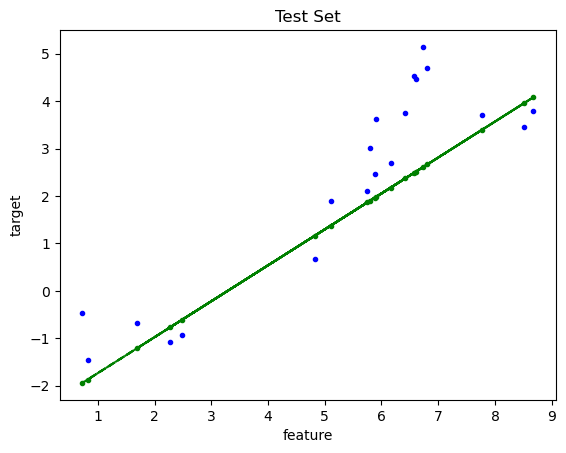

In [4]:

# You code is here: 

# Use the test data to predict the target 
predictedTest = reg.predict(xTest)

# Report the MSE 
print("The MSE is:")
print(mean_squared_error(yTest, predictedTest, squared=True))

# Plot 
plt.title("Test Set")
plt.xlabel("feature")
plt.ylabel("target")
plt.plot(xTest, yTest, 'b.')
plt.plot(xTest, predictedTest, 'g.', linestyle="--")


## Part 4: Try fitting y = f(x) using a polynomial function f(x) of increasing order. 
* Do this by the trick of adding additional polynomial features to your data before training your linear regression model. 
* You can do this easily yourself; you can add a quadratic feature. 
* Example: Use $x^2$ as an additional feature
* Print the shape of your new data set (Now you should have two features $x$, $x^2$)

In [5]:
# Your code is here 
    
# create new feature matrix with two features x, x^2. Let's call it "Xtr" (i.e., X transformed)
poly = PolynomialFeatures(2)
Xtr = poly.fit_transform(X)

# Print the shape of the new feature matrix (Xtr)
print(Xtr.shape)

# Print the first 5 enteries of your new feature matrix (Xtr) 
for i in range(5):
    print(Xtr[i])

# Standardize the feature matrix to [0, 1] range because the new feature can have a very large values
scaler = MinMaxScaler()
scaler.fit(Xtr)
scaler.data_max_
Xtr = scaler.transform(Xtr)

# Print the first 5 enteries of your new standardized feature matrix. 
print("\n") 
for i in range(5):
    print(Xtr[i])


(80, 3)
[ 1.          3.4447005  11.86596153]
[ 1.          4.7580645  22.63917779]
[ 1.          6.4170507  41.17853969]
[ 1.          5.7949309  33.58122414]
[ 1.          7.7304147  59.75931143]


[0.         0.35917313 0.14085221]
[0.         0.50645995 0.26936718]
[0.         0.69250646 0.49052541]
[0.         0.62273902 0.39989614]
[0.         0.83979327 0.71217762]


### Train a linear regression model with the new features $x$, $x^2$
* Your model now should be in the form y = $w_0 + w_1 x + w_2 x^2$
* **Report your new model coefficients**

In [6]:
# Your code is here 

# Fix the random seed
np.random.seed(0)

# Split your new data into train/test with 75/25 
xTrain, xTest, yTrain, yTest = train_test_split(Xtr,y,test_size=0.25, random_state=0)

# Fit a linear regression model using your training data
reg = LinearRegression()
reg.fit(xTrain, yTrain)

# Print the coefficients of the new trained model on the new features 
print("The coefficients are: ")
print(reg.coef_)



The coefficients are: 
[[0.         5.3517492  1.28612794]]


### Predict the test data using your trained model
* Check the MSE of the test data

In [7]:
# Your code is here 

# Use your trained model to predict the test data
pred = reg.predict(xTest)

# Print the MSE and report it in your submitted report 
print("The MSE is:")
print(mean_squared_error(yTest, pred, squared=True))



The MSE is:
1.4976296609240412


## Part 5:  Add more polynomials? How many degrees?
 
* We can use PolynomialFeatures from python to add more polynomial features instead of doing it by hand like you did in Part4 and then determine the best degree polynomials using cross validation 

### Part 5 (a) Add one more degree of polynomial :
* using PolynomialFeatures (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) 
* repeat what you did in Part 4. **Compare the coefficients you got in Part4 and using PolynomialFeatures**
     

In [8]:
# Your code is here 

transformation = PolynomialFeatures(degree=2, include_bias=False) # Add one more polynomial like the previous one

# Transform your features to add this new polynomial 
Xtr = poly.transform(X)

# Print the shape of the new transformed feature matrix
print(Xtr.shape)

# Print the first 5 enteries of your new feature matrix (Xtr) 
print("\n") 
for i in range(5):
    print(Xtr[i])
print("\n") 

# standardization to scale the data to the [0, 1] range
scaler = MinMaxScaler()
scaler.fit(Xtr)
Xtr = scaler.transform(Xtr)

# Split your new data into train/test with 75/25 
xTrain, xTest, yTrain, yTest = train_test_split(Xtr,y,test_size=0.25, random_state=0)

# Fit a linear regression model using your training data
reg = LinearRegression()
reg.fit(xTrain, yTrain)

# Print the coefficients of the new trained model on the new features
print("\n") 
print("The coefficients are: ")
print(reg.coef_)

# Use your trained model to predict the test data
predictedVal = reg.predict(xTest)

# Print the MSE and report it in your submitted report 
print("\n") 
print("The MSE is:")
print(mean_squared_error(yTest, predictedVal, squared=True))


(80, 3)


[ 1.          3.4447005  11.86596153]
[ 1.          4.7580645  22.63917779]
[ 1.          6.4170507  41.17853969]
[ 1.          5.7949309  33.58122414]
[ 1.          7.7304147  59.75931143]




The coefficients are: 
[[0.         5.3517492  1.28612794]]


The MSE is:
1.4976296609240412


### Part 5 (b): We need to use cross-validation to determine the value of $M$ (the degree of the polynomial)
* You can do this in a loop 

    1. Loop between $M = 1$ till $12$
    2. Transform your feature into higher order polynomial of degree $M$ using PolynomialFeatures
    3. Standardize the features between $[0,1]$ range
    4. We need to do cross validation. In order to do that we are going to split our data into train/test data with 90/10 split and then we are going to use the training data to do cross validation.
    5. We are going to use a new method called "cross_validate" with number of folds = 5 on the transformed training data using Linear Regression.
    6. The performance of each fold is measured using a parameter "scoring" which we will set as "neg_mean_squared_error" (check https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html )
    7. **Report the average MSE across the 5 folds for each $M$ for the train data and validation data**

* In one figrue, Plot the training error and the validation error across values of $M$. The X-axis should be $M$, the Y-axis should be the average training error vs. the average validation error. The title of your plot should be MSE vs. Degree. Use plot legend to differentiate between the plot of the training error and the plot of the validation error. **Report your observation**. 




degree:  1 MSE train: 1.34 MSE test: 1.42
degree:  2 MSE train: 1.34 MSE test: 1.44
degree:  3 MSE train: 0.67 MSE test: 0.75
degree:  4 MSE train: 0.62 MSE test: 0.70
degree:  5 MSE train: 0.50 MSE test: 0.77
degree:  6 MSE train: 0.38 MSE test: 0.46
degree:  7 MSE train: 0.36 MSE test: 0.86
degree:  8 MSE train: 0.35 MSE test: 0.46
degree:  9 MSE train: 0.35 MSE test: 1.11
degree:  10 MSE train: 0.33 MSE test: 1.06
degree:  11 MSE train: 0.33 MSE test: 7.95
degree:  12 MSE train: 0.33 MSE test: 15.67


As shown with the output, the best M/degree is 6 and 8


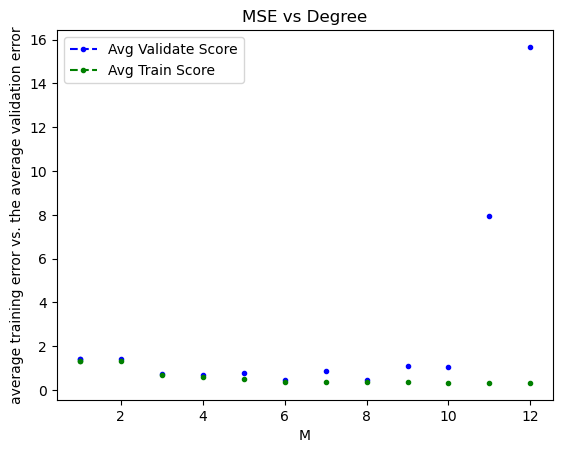

In [9]:
# Your code is here

maxdegree = 12
np.random.seed(0)

for M in range(1, maxdegree+1):
    trans = PolynomialFeatures(degree=M, include_bias=False) 
    X_transformed = trans.fit_transform(X)                 
    # Transform your features into higher order poynomial of degree M 
    # Standardize the features between [0,1]
    scaler = MinMaxScaler()
    scaler.fit(X_transformed)
    X_transformed = scaler.transform(X_transformed)
    
    
    # Split your transformed and standardized data into train/test 90/10
    X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.1, random_state=0)
    
    
    scores = cross_validate(reg, X_train, y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)     # Complete
    
    avg_validate_scores = np.mean(np.absolute(scores['test_score']))  # average the validate score from the 5 folds
    avg_train_scores = np.mean(np.absolute(scores['train_score'])) # average the train score from the 5 folds
    d = M
    
    #print("degree: ", d, "MSE train: %.2f" % avg_train_scores, "MSE test: %.2f" % avg_test_scores)
    print("degree: ", d, "MSE train: %.2f" % avg_train_scores, "MSE test: %.2f" % avg_validate_scores)
    
    plt.title("MSE vs Degree")
    plt.xlabel("M")
    plt.ylabel("average training error vs. the average validation error")
    plt.plot(M, avg_validate_scores, 'b.', linestyle="--")
    plt.plot(M, avg_train_scores, 'g.', linestyle="--")
    if (M==1):
        plt.plot(M, avg_validate_scores, 'b.', linestyle="--", label="Avg Validate Score")
        plt.plot(M, avg_train_scores, 'g.', linestyle="--", label="Avg Train Score")
        plt.legend(loc = "upper left")
        
#For knowing how to add labels, I referred to the following website:
#https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible
    
print("\n\nAs shown with the output, the best M/degree is 6 and 8")


### Part 5 (c): Use the best degree $M$ that gives the best average validation error for predicting the test data
* Transform your data into a higher order polynomial of degree M = best degree 
* Standardize your transformed data between [0,1]
* Split your data into train/test 90/10 using train_test_split
* Using Linear Regressiion to fit your training data
* **Print the coefficients of your trained model (Hint: The number of coefficients should match the M that you choose)**
* **Report the MSE when predicting the test data using your trained Model with M polynomial.**
* **What did you observe compared to Part 4?***

In [10]:
# Your code is here 
#based on the previous problem, the best degree is 6 and 8

#transform data to best degree
trans = PolynomialFeatures(degree=6, include_bias=False) 
X_transformed = trans.fit_transform(X)  

#standardize data between [0,1]
scaler = MinMaxScaler()
scaler.fit(X_transformed)
X_transformed = scaler.transform(X_transformed)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.1, random_state=0)

#linear regression fit
reg = LinearRegression()
reg.fit(X_train, y_train)

#report coefficients and MSE
print("\n") 
print("The coefficients are: ")
print(reg.coef_)

# Print the MSE and report it in your submitted report 
predictedValues = reg.predict(X_test)
print("\n") 
print("The MSE is:")
print(mean_squared_error(y_test, predictedValues, squared=True))





The coefficients are: 
[[  -45.79002973   450.32645974 -1929.68301243  3963.73979246
  -3730.7919153   1296.81684244]]


The MSE is:
0.34948357743255076


## Part 6: Control the weights: Regularized Linear Regression  - Ridge Regression

Here we are going to use ridge regression to avoid the overfitting problem with higher polynomials and to have simpler model with degree $M$ that we chose in the previous part. 

$$ min_w \| Xw - y \|_2^2 + \alpha \|w\|_2^2 $$
 
 
* Use a regulator $\alpha$ of value $0.2$ and fit your transformed training data (with degree M from last step) on a ridge linear regression model using "Ridge" from python. 


* **Print and report the coefficients of your trained ridge linear regression**

* **Print and report the MSE when predicting the test data using your trained ridge regression model with M polynomials.** 

* **What do you observe? **
 

In [11]:
# Your code is here

ridgereg = Ridge(alpha=0.2)
ridgereg.fit(X_train, y_train)
ridgePredict = ridgereg.predict(X_test)

#report coefficients and MSE
print("\n") 
print("The coefficients are: ")
print(ridgereg.coef_)

# Print the MSE and report it in your submitted report 
print("\n") 
print("The MSE is:")
print(mean_squared_error(y_test, ridgePredict, squared=True))


print("What I notice is that the coefficients are siginificantly smaller and the MSE is closer to one.")

#Complete





The coefficients are: 
[[ 1.94839976  5.17585788  3.68401632  0.76108791 -2.08680145 -4.36911121]]


The MSE is:
1.0799858409000536
What I notice is that the coefficients are siginificantly smaller and the MSE is closer to one.
